Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan
#gr(size=(600,600));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

### snippet 4.8

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df);

Show first 5 rows of DataFrame df

In [5]:
first(df2, 5)

,height,weight,age,male
,Float64,Float64,Float64,Int64
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.14

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 160, length=200), 200);
sigma_list = repeat(range(4, 9, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df2[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:15
└ @ Core ./string:15


,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-3812.78,-3822.41,0.0
2,140.101,4.0,-3780.61,-3790.23,0.0
3,140.201,4.0,-3748.67,-3758.28,0.0
4,140.302,4.0,-3716.95,-3726.55,0.0
5,140.402,4.0,-3685.45,-3695.05,0.0
6,140.503,4.0,-3654.18,-3663.76,0.0
7,140.603,4.0,-3623.13,-3632.7,0.0
8,140.704,4.0,-3592.3,-3601.86,0.0
9,140.804,4.0,-3561.69,-3571.24,0.0


### Snippet 4.15

Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:1
└ @ Core string:1


,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,155.176,7.61809,-1220.5,-1228.98,0.347908
2,154.673,7.86935,-1219.53,-1228.04,0.889623
3,154.774,8.0201,-1219.95,-1228.45,0.586759
4,154.673,7.86935,-1219.53,-1228.04,0.889623
5,154.975,7.84422,-1219.89,-1228.38,0.63412
6,154.372,7.46734,-1220.0,-1228.52,0.546511
7,154.372,7.51759,-1219.84,-1228.37,0.638208
8,155.176,8.0201,-1220.78,-1229.26,0.261554
9,154.472,7.51759,-1219.74,-1228.25,0.716319


### Snippet 4.19

Density of mu

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:1
└ @ Core string:1


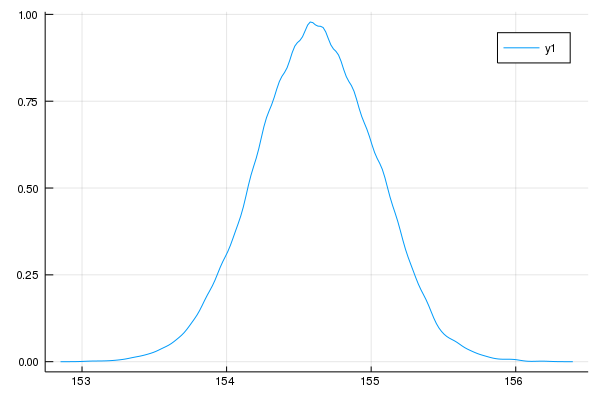

In [8]:
density(samples[:mu])

Density of sigma

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at string:1
└ @ Core string:1


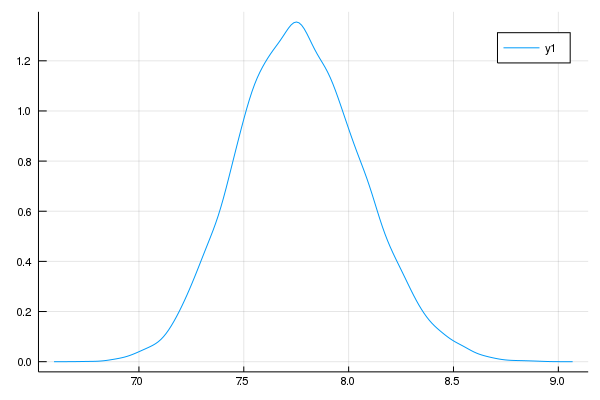

In [9]:
density(samples[:sigma])

### Snippet 4.20

Hdp mu

In [10]:
#hpd(samples[:mu])

Hdp sigma

In [11]:
#hpd(samples[:sigma])

End of `clip-14-20.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*